# Downlaod Dataset


In [1]:
!wget http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
!wget http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
!wget https://ai.stanford.edu/~jkrause/cars/car_devkit.tgz      
!wget http://ai.stanford.edu/~jkrause/car196/cars_test_annos_withlabels.mat

--2022-04-14 06:51:28--  http://ai.stanford.edu/~jkrause/car196/cars_train.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 979269282 (934M) [application/x-gzip]
Saving to: ‘cars_train.tgz’

cars_train.tgz      100%[===================>] 933.90M  54.0MB/s    in 18s     

2022-04-14 06:51:46 (50.9 MB/s) - ‘cars_train.tgz’ saved [979269282/979269282]

--2022-04-14 06:51:46--  http://ai.stanford.edu/~jkrause/car196/cars_test.tgz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 977350468 (932M) [application/x-gzip]
Saving to: ‘cars_test.tgz’

cars_test.tgz       100%[===================>] 932.07M  56.0MB/s    in 18s     

2022-04-14 06:52:04 (52.1 MB/s) - ‘cars_test.tgz’ saved [977350468/977350468]

-

# Crop images and save

In [2]:
import tarfile
import scipy.io
import numpy as np
import os
import cv2 as cv
import shutil
import random

def ensure_folder(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

def save_train_data(fnames, labels, bboxes):
    src_folder = 'cars_train'
    num_samples = len(fnames)
    train_split = 0.8
    num_train = int(round(num_samples * train_split))
    train_indexes = random.sample(range(num_samples), num_train)
    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        print("{} -> {}".format(fname, label))
        if i in train_indexes:
            dst_folder = 'data/train'
        else:
            dst_folder = 'data/valid'
        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)


def save_test_data(fnames, labels,bboxes):
    src_folder = 'cars_test'
    dst_folder = 'data/test'
    num_samples = len(fnames)
    for i in range(num_samples):
        fname = fnames[i]
        label = labels[i]
        (x1, y1, x2, y2) = bboxes[i]
        src_path = os.path.join(src_folder, fname)
        src_image = cv.imread(src_path)
        height, width = src_image.shape[:2]
        margin = 16
        x1 = max(0, x1 - margin)
        y1 = max(0, y1 - margin)
        x2 = min(x2 + margin, width)
        y2 = min(y2 + margin, height)
        print("{} -> {}".format(fname, label))
        dst_path = os.path.join(dst_folder, label)
        if not os.path.exists(dst_path):
            os.makedirs(dst_path)
        dst_path = os.path.join(dst_path, fname)
        crop_image = src_image[y1:y2, x1:x2]
        dst_img = cv.resize(src=crop_image, dsize=(img_height, img_width))
        cv.imwrite(dst_path, dst_img)

def process_train_data():
    print("Processing train data...")
    cars_annos = scipy.io.loadmat('devkit/cars_train_annos')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    fnames = []
    class_ids = []
    bboxes = []
    labels = []
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = annotation[0][4][0][0]
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)
    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)
    save_train_data(fnames, labels, bboxes)

def process_test_data():
    print("Processing test data...")
    cars_annos = scipy.io.loadmat('/content/cars_test_annos_withlabels.mat')
    annotations = cars_annos['annotations']
    annotations = np.transpose(annotations)
    fnames = []
    class_ids = []
    bboxes = []
    labels = []
    for annotation in annotations:
        bbox_x1 = annotation[0][0][0][0]
        bbox_y1 = annotation[0][1][0][0]
        bbox_x2 = annotation[0][2][0][0]
        bbox_y2 = annotation[0][3][0][0]
        class_id = int(annotation[0][4][0][0])
        labels.append('%04d' % (class_id,))
        fname = annotation[0][5][0]
        bboxes.append((bbox_x1, bbox_y1, bbox_x2, bbox_y2))
        class_ids.append(class_id)
        fnames.append(fname)
    labels_count = np.unique(class_ids).shape[0]
    print(np.unique(class_ids))
    print('The number of different cars is %d' % labels_count)
    save_test_data(fnames, labels, bboxes)

if __name__ == '__main__':
    img_width, img_height = 224, 224
    print('Extracting cars_train.tgz...')
    if not os.path.exists('cars_train'):
        with tarfile.open('cars_train.tgz', "r:gz") as tar:
            tar.extractall()
    print('Extracting cars_test.tgz...')
    if not os.path.exists('cars_test'):
        with tarfile.open('cars_test.tgz', "r:gz") as tar:
            tar.extractall()
    print('Extracting car_devkit.tgz...')
    if not os.path.exists('devkit'):
        with tarfile.open('car_devkit.tgz', "r:gz") as tar:
            tar.extractall()
    cars_meta = scipy.io.loadmat('devkit/cars_meta')
    class_names = cars_meta['class_names']  # shape=(1, 196)
    class_names = np.transpose(class_names)
    print('class_names.shape: ' + str(class_names.shape))
    print('Sample class_name: [{}]'.format(class_names[8][0][0]))
    ensure_folder('data/train')
    ensure_folder('data/valid')
    ensure_folder('data/test')
    process_train_data()
    process_test_data()
    shutil.rmtree('cars_train')
    shutil.rmtree('cars_test')

Streaming output truncated to the last 5000 lines.
03042.jpg -> 0178
03043.jpg -> 0036
03044.jpg -> 0106
03045.jpg -> 0034
03046.jpg -> 0151
03047.jpg -> 0149
03048.jpg -> 0112
03049.jpg -> 0074
03050.jpg -> 0113
03051.jpg -> 0103
03052.jpg -> 0070
03053.jpg -> 0045
03054.jpg -> 0071
03055.jpg -> 0167
03056.jpg -> 0006
03057.jpg -> 0121
03058.jpg -> 0024
03059.jpg -> 0007
03060.jpg -> 0103
03061.jpg -> 0136
03062.jpg -> 0115
03063.jpg -> 0122
03064.jpg -> 0079
03065.jpg -> 0116
03066.jpg -> 0110
03067.jpg -> 0131
03068.jpg -> 0128
03069.jpg -> 0025
03070.jpg -> 0025
03071.jpg -> 0194
03072.jpg -> 0153
03073.jpg -> 0001
03074.jpg -> 0094
03075.jpg -> 0090
03076.jpg -> 0097
03077.jpg -> 0160
03078.jpg -> 0091
03079.jpg -> 0181
03080.jpg -> 0036
03081.jpg -> 0182
03082.jpg -> 0051
03083.jpg -> 0160
03084.jpg -> 0114
03085.jpg -> 0067
03086.jpg -> 0047
03087.jpg -> 0116
03088.jpg -> 0099
03089.jpg -> 0120
03090.jpg -> 0005
03091.jpg -> 0117
03092.jpg -> 0025
03093.jpg -> 0082
03094.jpg -> 

In [26]:
from google.colab import drive
drive.mount('/content/drive')

#Zip and Store Car dataset after preprocess
# !tar -zcvf Cars_dataset.tar.gz ./data
# !cp ./Cars_dataset.tar.gz ./drive/MyDrive/

Mounted at /content/drive


# Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp ./drive/MyDrive/Cars_dataset.tar.gz ./
!tar zxvf Cars_dataset.tar.gz

Streaming output truncated to the last 5000 lines.
./data/train/0054/
./data/train/0054/06396.jpg
./data/train/0054/06305.jpg
./data/train/0054/01032.jpg
./data/train/0054/07075.jpg
./data/train/0054/06739.jpg
./data/train/0054/00626.jpg
./data/train/0054/02014.jpg
./data/train/0054/05332.jpg
./data/train/0054/01806.jpg
./data/train/0054/02945.jpg
./data/train/0054/04774.jpg
./data/train/0054/04703.jpg
./data/train/0054/06514.jpg
./data/train/0054/07699.jpg
./data/train/0054/01815.jpg
./data/train/0054/02792.jpg
./data/train/0054/06815.jpg
./data/train/0054/03222.jpg
./data/train/0054/03083.jpg
./data/train/0054/04478.jpg
./data/train/0054/01268.jpg
./data/train/0054/00536.jpg
./data/train/0054/08062.jpg
./data/train/0054/08094.jpg
./data/train/0054/01627.jpg
./data/train/0054/01647.jpg
./data/train/0054/04566.jpg
./data/train/0054/05730.jpg
./data/train/0054/02546.jpg
./data/train/0054/06060.jpg
./data/train/0054/06611.jpg
./data/train/0054/01125.jpg
./data/train/0080/
./data/train/00

# Define DataLoaders

In [6]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, Subset
import os
import numpy as np

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.GaussianBlur(kernel_size=(5, 9), sigma=(0.1, 5)),
        transforms.RandomAdjustSharpness(sharpness_factor=2, p=0.5),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406],std=[0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

image_datasets = {x: datasets.ImageFolder(os.path.join("./data/", x),data_transforms[x]) for x in ['train', 'valid','test']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=16,shuffle=True, num_workers=2) for x in ['train', 'valid','test']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid','test']}
class_names = np.array(image_datasets['train'].classes).astype(int)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

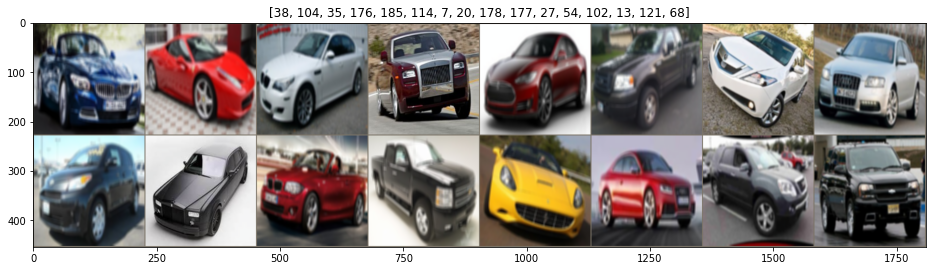

In [7]:
import matplotlib.pyplot as plt
import torchvision

plt.figure(figsize=(16,9))
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)

inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)
imshow(out, title=[class_names[x] for x in classes])

# Training and test

In [33]:
import copy
import time

def train_model(model, criterion, optimizer, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    history={"train":{"loss":[],"accuracy":[]},"valid":{"loss":[0],"accuracy":[0]}}
    for epoch in range(1,num_epochs+1):
        print('Epoch {}/{}'.format(epoch, num_epochs))
        print('-' * 10)
        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train() 
            else:
                model.eval()  
            running_loss = 0.0
            running_corrects = 0
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                optimizer.zero_grad()
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            history[phase]["accuracy"].append(epoch_acc.item())
            history[phase]["loss"].append(epoch_loss)
            if phase == 'valid' and epoch_acc > best_acc:
                print("validation accuracy improved from {:.4f} to {:.4f}".format(
                best_acc,epoch_acc))
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())
        print()
    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))
    model.load_state_dict(best_model_wts)
    return (history,model)
    
def test_model(model,criterion):
    model.eval()  
    running_corrects = 0
    running_loss = 0.0
    for inputs, labels in dataloaders["test"]:
        inputs = inputs.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, preds = torch.max(outputs, 1)
            running_loss += loss.item() * inputs.size(0)
            running_corrects += torch.sum(preds == labels.data)
    acc = running_corrects.double() / dataset_sizes["test"]
    loss = running_loss / dataset_sizes["test"]
    print('Test Accuracy: {:.4f} , Loss: {:.4f}'.format(acc,loss))

# Networks

In [9]:
import torchvision.models as models
import torch.nn as nn
import torch.optim as optim

model = torchvision.models.efficientnet_b0(pretrained=True)

for params in model.parameters():
    params.requires_grad = False

num_ftrs = model.classifier[1].in_features
model.classifier[1] = nn.Sequential(
    nn.BatchNorm1d(num_features=num_ftrs),    
    nn.Linear(num_ftrs, 512),
    nn.ReLU(),
    nn.BatchNorm1d(num_features=512),
    nn.Dropout(0.4),
    nn.Linear(512, 196),
    )
model = model.to(device)

Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

In [ ]:
for name,params in model.named_parameters():
    print(name,params.requires_grad)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight False
features.1.0.block.1.fc1.bias False
features.1.0.block.1.fc2.weight False
features.1.0.block.1.fc2.bias False
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight False
features.2.0.block.2.fc1.bias False
features.2.0.block.2.fc2.weight False
features.2.0.block.2.fc2.bias False
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bia

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.0001)

history,model_cls = train_model(model, criterion, optimizer,num_epochs=60)
torch.save(model_cls, 'best_model_cls.pth')

Epoch 1/60
----------
train Loss: 5.3519 Acc: 0.0106
valid Loss: 5.2748 Acc: 0.0190
validation accuracy improved from 0.0000 to 0.0190

Epoch 2/60
----------
train Loss: 4.9026 Acc: 0.0483
valid Loss: 4.8202 Acc: 0.0681
validation accuracy improved from 0.0190 to 0.0681

Epoch 3/60
----------
train Loss: 4.5428 Acc: 0.0906
valid Loss: 4.8489 Acc: 0.0847
validation accuracy improved from 0.0681 to 0.0847

Epoch 4/60
----------
train Loss: 4.2236 Acc: 0.1383
valid Loss: 4.4610 Acc: 0.1062
validation accuracy improved from 0.0847 to 0.1062

Epoch 5/60
----------
train Loss: 3.9998 Acc: 0.1751
valid Loss: 4.3124 Acc: 0.1258
validation accuracy improved from 0.1062 to 0.1258

Epoch 6/60
----------
train Loss: 3.7968 Acc: 0.2180
valid Loss: 4.2431 Acc: 0.1314
validation accuracy improved from 0.1258 to 0.1314

Epoch 7/60
----------
train Loss: 3.5931 Acc: 0.2494
valid Loss: 4.1623 Acc: 0.1479
validation accuracy improved from 0.1314 to 0.1479

Epoch 8/60
----------
train Loss: 3.4365 Acc: 0.

In [34]:
model_cls = torch.load('/content/best_model_cls.pth')
test_model(model_cls,criterion)

Test Accuracy: 0.2918 , Loss: 3.3055


In [ ]:
model_all = torch.load('best_model_cls.pth')
for name,params in model_all.named_parameters():
    params.requires_grad = True
    print(name,params.requires_grad)

features.0.0.weight True
features.0.1.weight True
features.0.1.bias True
features.1.0.block.0.0.weight True
features.1.0.block.0.1.weight True
features.1.0.block.0.1.bias True
features.1.0.block.1.fc1.weight True
features.1.0.block.1.fc1.bias True
features.1.0.block.1.fc2.weight True
features.1.0.block.1.fc2.bias True
features.1.0.block.2.0.weight True
features.1.0.block.2.1.weight True
features.1.0.block.2.1.bias True
features.2.0.block.0.0.weight True
features.2.0.block.0.1.weight True
features.2.0.block.0.1.bias True
features.2.0.block.1.0.weight True
features.2.0.block.1.1.weight True
features.2.0.block.1.1.bias True
features.2.0.block.2.fc1.weight True
features.2.0.block.2.fc1.bias True
features.2.0.block.2.fc2.weight True
features.2.0.block.2.fc2.bias True
features.2.0.block.3.0.weight True
features.2.0.block.3.1.weight True
features.2.0.block.3.1.bias True
features.2.1.block.0.0.weight True
features.2.1.block.0.1.weight True
features.2.1.block.0.1.bias True
features.2.1.block.1.

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_all.parameters()), lr=0.0001)
history,model_all = train_model(model_all, criterion, optimizer,num_epochs=40)
torch.save(model_all, 'best_model_all.pth')

Epoch 1/40
----------
train Loss: 4.6038 Acc: 0.0927
valid Loss: 4.1219 Acc: 0.1602
validation accuracy improved from 0.0000 to 0.1602

Epoch 2/40
----------
train Loss: 3.7547 Acc: 0.2264
valid Loss: 3.3818 Acc: 0.2959
validation accuracy improved from 0.1602 to 0.2959

Epoch 3/40
----------
train Loss: 2.9982 Acc: 0.3845
valid Loss: 2.6559 Acc: 0.4524
validation accuracy improved from 0.2959 to 0.4524

Epoch 4/40
----------
train Loss: 2.3533 Acc: 0.5268
valid Loss: 2.1347 Acc: 0.5648
validation accuracy improved from 0.4524 to 0.5648

Epoch 5/40
----------
train Loss: 1.8271 Acc: 0.6477
valid Loss: 1.6263 Acc: 0.6636
validation accuracy improved from 0.5648 to 0.6636

Epoch 6/40
----------
train Loss: 1.4074 Acc: 0.7429
valid Loss: 1.2954 Acc: 0.7188
validation accuracy improved from 0.6636 to 0.7188

Epoch 7/40
----------
train Loss: 1.0726 Acc: 0.8104
valid Loss: 1.0691 Acc: 0.7649
validation accuracy improved from 0.7188 to 0.7649

Epoch 8/40
----------
train Loss: 0.8197 Acc: 0.

In [35]:
model_all = torch.load('/content/best_model_all.pth')
test_model(model_all,criterion)

Test Accuracy: 0.8135 , Loss: 0.7456


In [ ]:
model_block = torch.load('best_model_cls.pth')
for name,params in model_block.features[:6].named_parameters():
    params.requires_grad =False
    print(name,params.requires_grad)
for name,params in model_block.features[6:9].named_parameters():
    params.requires_grad =True
    print(name,params.requires_grad)

features.0.0.weight False
features.0.1.weight False
features.0.1.bias False
features.1.0.block.0.0.weight False
features.1.0.block.0.1.weight False
features.1.0.block.0.1.bias False
features.1.0.block.1.fc1.weight False
features.1.0.block.1.fc1.bias False
features.1.0.block.1.fc2.weight False
features.1.0.block.1.fc2.bias False
features.1.0.block.2.0.weight False
features.1.0.block.2.1.weight False
features.1.0.block.2.1.bias False
features.2.0.block.0.0.weight False
features.2.0.block.0.1.weight False
features.2.0.block.0.1.bias False
features.2.0.block.1.0.weight False
features.2.0.block.1.1.weight False
features.2.0.block.1.1.bias False
features.2.0.block.2.fc1.weight False
features.2.0.block.2.fc1.bias False
features.2.0.block.2.fc2.weight False
features.2.0.block.2.fc2.bias False
features.2.0.block.3.0.weight False
features.2.0.block.3.1.weight False
features.2.0.block.3.1.bias False
features.2.1.block.0.0.weight False
features.2.1.block.0.1.weight False
features.2.1.block.0.1.bia

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model_block.parameters()), lr=0.0001)
history,model_block = train_model(model_block, criterion, optimizer,num_epochs=30)
torch.save(model_all, 'best_model_block.pth')

Epoch 1/30
----------
train Loss: 1.3858 Acc: 0.6436
valid Loss: 2.8656 Acc: 0.3468
validation accuracy improved from 0.0000 to 0.3468

Epoch 2/30
----------
train Loss: 1.0665 Acc: 0.7243
valid Loss: 2.6456 Acc: 0.4052
validation accuracy improved from 0.3468 to 0.4052

Epoch 3/30
----------
train Loss: 0.9099 Acc: 0.7685
valid Loss: 2.0569 Acc: 0.4800
validation accuracy improved from 0.4052 to 0.4800

Epoch 4/30
----------
train Loss: 0.7828 Acc: 0.7952
valid Loss: 2.0159 Acc: 0.4929
validation accuracy improved from 0.4800 to 0.4929

Epoch 5/30
----------
train Loss: 0.6803 Acc: 0.8266
valid Loss: 2.0646 Acc: 0.4942
validation accuracy improved from 0.4929 to 0.4942

Epoch 6/30
----------
train Loss: 0.6223 Acc: 0.8356
valid Loss: 2.4746 Acc: 0.4365

Epoch 7/30
----------
train Loss: 0.5588 Acc: 0.8568
valid Loss: 2.4794 Acc: 0.4506

Epoch 8/30
----------
train Loss: 0.5012 Acc: 0.8724
valid Loss: 1.8522 Acc: 0.5328
validation accuracy improved from 0.4942 to 0.5328

Epoch 9/30
---

In [37]:
model_block = torch.load('/content/best_model_block.pth')
test_model(model_block,criterion)

Test Accuracy: 0.7313 , Loss: 1.0310
